In [20]:
import numpy as np
import pandas as pd

In [21]:
athletes = pd.read_csv('C:\\Users\\enama\\Downloads\\Olympics\\athlete_events.csv')

In [22]:
region = pd.read_csv('C:\\Users\\enama\\Downloads\\Olympics\\noc_regions.csv')

In [23]:
df = athletes.merge(region, how = 'left', on = 'NOC')

In [24]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [349]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# 1. Handle null values in dataset and remove unwanted symbols if any. 
Filling Nan values as average except medal

In [350]:
df['Age'].fillna((df['Age'].mean()),inplace = True)
df['Height'].fillna((df['Height'].mean()),inplace = True)
df['Weight'].fillna((df['Weight'].mean()),inplace = True)

In [351]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object

# 2.What is the unique count of sports, events, and different city, and the team participated


In [18]:
df[['Sport','Event','City','Team']].nunique()

Sport      66
Event     765
City       42
Team     1184
dtype: int64

# 3.What is the average age of female and male players from the United States, China, Netherland, Spain, France, Italy


In [71]:
countries = ['Spain', 'United States','China', 'Netherlands', 'France', 'Italy']

In [72]:
filt = df['Team'].isin(countries)

In [73]:
grp = df.loc[filt,['Team','Age','Name']]

In [74]:
grp.groupby('Team')['Age'].mean()

Team
China            22.949091
France           26.642548
Italy            25.746624
Netherlands      26.555400
Spain            25.214865
United States    25.934639
Name: Age, dtype: float64

# 4.What is the total count of players from the United States, China, Netherland, Spain,France, Italy?


In [75]:
grp.groupby('Team')['Name'].count()

Team
China             4975
France           11988
Italy            10260
Netherlands       5718
Spain             5224
United States    17847
Name: Name, dtype: int64

# 5.What are the different kinds of sports in which players have participated in different cities of the United States

In [67]:
df[df['Team'] == 'United States'][['Name','Sport','City']].drop_duplicates(keep='first')

,Name,Sport,City
10,Per Knut Aaland,Cross Country Skiing,Albertville
14,Per Knut Aaland,Cross Country Skiing,Lillehammer
18,John Aalberg,Cross Country Skiing,Albertville
22,John Aalberg,Cross Country Skiing,Lillehammer
186,Stephen Anthony Abas,Wrestling,Athina
...,...,...,...
270803,David Santos Zuniga,Wrestling,Atlanta
270849,Rami Zur,Canoeing,Athina
270851,Rami Zur,Canoeing,Beijing
271044,"Victor Andrew ""Vic"" Zwolak",Athletics,Tokyo


# 6. What are the names of players who have brought gold, silver and bronze medal?

In [366]:
df.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [36]:
medal = ['Gold', 'Bronze', 'Silver']

In [37]:
filt1 = df['Medal'].isin(medal)

In [38]:
df.loc[filt1, ['Name','Medal']].drop_duplicates(keep = 'first')

,Name,Medal
3,Edgar Lindenau Aabye,Gold
37,Arvo Ossian Aaltonen,Bronze
40,Juhamatti Tapio Aaltonen,Bronze
41,Paavo Johannes Aaltonen,Bronze
42,Paavo Johannes Aaltonen,Gold
...,...,...
271078,Galina Ivanovna Zybina (-Fyodorova),Silver
271080,Galina Ivanovna Zybina (-Fyodorova),Bronze
271082,Bogusaw Zych,Bronze
271102,Olesya Nikolayevna Zykina,Bronze


In [370]:
pd.set_option('display.max_rows',None)

# 7. Which team has brought the most number of female and male players?

In [39]:
df.groupby('Team')['Sex'].count().sort_values(ascending=False).head(1)
# United states had most numberb of players

Team
United States    17847
Name: Sex, dtype: int64

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns

# 9.What are the different sports played in a different season?

In [32]:
#summer
df[df['Season'] == 'Summer']['Sport'].drop_duplicates(keep = 'first')

0                    Basketball
1                          Judo
2                      Football
3                    Tug-Of-War
26                    Athletics
29                     Swimming
31                    Badminton
32                      Sailing
41                   Gymnastics
58             Art Competitions
79                     Handball
80                Weightlifting
81                    Wrestling
88                   Water Polo
91                       Hockey
92                       Rowing
107                     Fencing
118               Equestrianism
124                    Shooting
134                      Boxing
146                   Taekwondo
149                     Cycling
168                      Diving
169                    Canoeing
184                      Tennis
214           Modern Pentathlon
283                        Golf
286                    Softball
287                     Archery
291                  Volleyball
295       Synchronized Swimming
498     

In [31]:
# winter
df[df['Season'] == 'Winter']['Sport'].drop_duplicates(keep = 'first')

4                    Speed Skating
10            Cross Country Skiing
28                      Ice Hockey
34                        Biathlon
59                   Alpine Skiing
87                            Luge
99                       Bobsleigh
265                 Figure Skating
633                Nordic Combined
726               Freestyle Skiing
1326                   Ski Jumping
1366                       Curling
2320                  Snowboarding
2848     Short Track Speed Skating
3837                      Skeleton
10854          Military Ski Patrol
30323                     Alpinism
Name: Sport, dtype: object

# 10. What are the average height and weight of players who participated in football, Judo, basketball?


In [377]:
games = ['Football', 'Judo', 'Basketball']
filt = df['Sport'].isin(games)
grp = df.loc[filt, ('Sport','Height','Weight')]

In [378]:
grp.groupby('Sport')['Height','Weight'].mean()

,Height,Weight
Sport,,
Basketball,188.627210,82.925629
Football,175.382529,70.530644
Judo,174.308847,78.007327


In [379]:
import warnings
warnings.filterwarnings('ignore')

# 11. How many sports and events were player in 1992 winter, 1994 winter 2000 summer 2002 winter

In [42]:
#1992
df[(df['Year']== 1992) & (df['Season'] == 'Winter')][['Sport','Event']].drop_duplicates(keep = 'first')

,Sport,Event
6,Speed Skating,Speed Skating Women's 500 metres
7,Speed Skating,"Speed Skating Women's 1,000 metres"
10,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres
11,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres
12,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...
13,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...
59,Alpine Skiing,Alpine Skiing Men's Downhill
60,Alpine Skiing,Alpine Skiing Men's Super G
61,Alpine Skiing,Alpine Skiing Men's Giant Slalom
62,Alpine Skiing,Alpine Skiing Men's Slalom


In [43]:
1994
df[(df['Year']== 1994) & (df['Season'] == 'Winter')][['Sport','Event']].drop_duplicates(keep = 'first')

,Sport,Event
8,Speed Skating,Speed Skating Women's 500 metres
9,Speed Skating,"Speed Skating Women's 1,000 metres"
14,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres
15,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres
16,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...
...,...,...
24598,Figure Skating,Figure Skating Men's Singles
27195,Alpine Skiing,Alpine Skiing Women's Super G
27325,Alpine Skiing,Alpine Skiing Women's Downhill
28184,Freestyle Skiing,Freestyle Skiing Women's Aerials


In [382]:
#2000
df[(df['Year']== 2000) & (df['Season'] == 'Summer')][['Sport','Event']].drop_duplicates(keep = 'first')

,Sport,Event
31,Badminton,Badminton Men's Singles
33,Sailing,Sailing Women's Windsurfer
57,Athletics,Athletics Men's Shot Put
81,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman"
93,Rowing,Rowing Men's Lightweight Double Sculls
103,Swimming,Swimming Men's 100 metres Butterfly
104,Swimming,Swimming Men's 200 metres Butterfly
146,Taekwondo,Taekwondo Men's Flyweight
166,Swimming,Swimming Men's 4 x 100 metres Medley Relay
168,Diving,Diving Men's Platform


In [383]:
#2002
df[(df['Year']== 2002) & (df['Season'] == 'Winter')][['Sport','Event']].drop_duplicates(keep = 'first')

,Sport,Event
28,Ice Hockey,Ice Hockey Men's Ice Hockey
72,Alpine Skiing,Alpine Skiing Men's Downhill
73,Alpine Skiing,Alpine Skiing Men's Super G
74,Alpine Skiing,Alpine Skiing Men's Giant Slalom
75,Alpine Skiing,Alpine Skiing Men's Slalom
76,Alpine Skiing,Alpine Skiing Men's Combined
121,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres
122,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres
123,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...
738,Luge,Luge Women's Singles


# 12. List the names of players who brought gold, silver and bronze medal.

In [44]:
medal = ['Gold', 'Bronze', 'Silver']
filt1 = df['Medal'].isin(medal)
df.loc[filt1, ['Name','Medal']].drop_duplicates(keep = 'first')

,Name,Medal
3,Edgar Lindenau Aabye,Gold
37,Arvo Ossian Aaltonen,Bronze
40,Juhamatti Tapio Aaltonen,Bronze
41,Paavo Johannes Aaltonen,Bronze
42,Paavo Johannes Aaltonen,Gold
...,...,...
271078,Galina Ivanovna Zybina (-Fyodorova),Silver
271080,Galina Ivanovna Zybina (-Fyodorova),Bronze
271082,Bogusaw Zych,Bronze
271102,Olesya Nikolayevna Zykina,Bronze


# 13. What is the highest number of sports played in the year 1990, 1992, 1994, 2016?


In [45]:
# 1992 Athletics had mostly played 
df[df['Year'] == 1992]['Sport'].value_counts().sort_values(ascending = False).head(5)

Athletics               2054
Swimming                1615
Gymnastics              1255
Alpine Skiing            750
Cross Country Skiing     717
Name: Sport, dtype: int64

In [46]:
# 1994 cross country skiing had mostly played
df[df['Year'] == 1994]['Sport'].value_counts().sort_values(ascending = False).head(5)

Cross Country Skiing    639
Alpine Skiing           544
Biathlon                416
Speed Skating           318
Ice Hockey              268
Name: Sport, dtype: int64

In [48]:
# 2016 Athletics had mostly played
df[df['Year'] == 2016]['Sport'].value_counts().sort_values(ascending = False).head(5)

Athletics     2508
Swimming      1568
Gymnastics     861
Cycling        667
Shooting       555
Name: Sport, dtype: int64

# 14. What are the different sports played by female players? In which sport, most numbers of female players have participated. Visualize the same

In [388]:
b = df[df['Sex'] == 'F']['Sport'].value_counts().sort_values(ascending = False).head(10)

<AxesSubplot:>

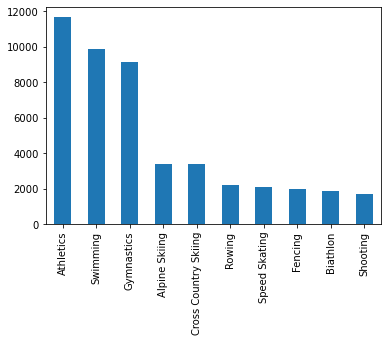

In [389]:
b.plot.bar()

# 15. Perform the above problem for male players as well.

In [390]:
c = df[df['Sex'] == 'M']['Sport'].value_counts().sort_values(ascending = False).head(10)

<AxesSubplot:>

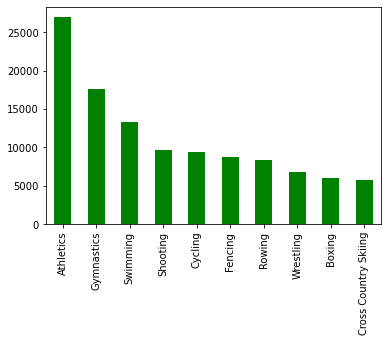

In [391]:
c.plot.bar(color='green')

# 16. Which city has the maximum number of players?

In [57]:
df.City.value_counts().head(5)

London            22426
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Name: City, dtype: int64

In [56]:
df[df['City'] == 'London']['Name'].drop_duplicates(keep = 'first').count()
#London has maximum number of players

16924

# 17. Show line chart which tells variation in a number of players from 1990 to 2000 of India and Pakistan. (Draw separate chart for India and Pakistan)


In [393]:
df[((df['Year'] == 1990) | (df['Year'] == 2000)) & ((df['Team']== 'India') | (df['Team'] == 'Pakistan'))][['Team','Year']].value_counts()

Team      Year
India     2000    70
Pakistan  2000    27
dtype: int64

In [64]:
# there is no data present in 1990
df[df['Year'] == 1990]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes


# 18. Draw a pie chart to show the percentage of male and female players across the world

<AxesSubplot:ylabel='Sex'>

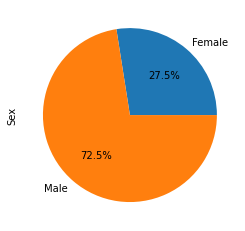

In [402]:
lab = ['Female', 'Male']
df.groupby('Sex')['Sex'].count().plot.pie(autopct = '%1.1f%%', labels = lab)

# 19. Which team has won the maximum number of gold, silver and bronze? Visualize the same.

United States had won highest number of medals

In [404]:
medal = ['Gold', 'Bronze', 'Silver']
filt1 = df['Medal'].isin(medal)
c = df.loc[filt1, ['Team','Medal']]

<AxesSubplot:ylabel='Team'>

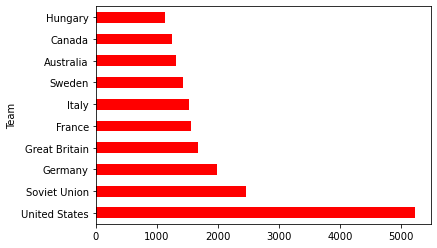

In [409]:
c.groupby(['Team'])['Medal'].count().sort_values(ascending=False).head(10).plot.barh(color='red')

# 20. Who is the tallest and shortest player?

# Tallest player is 'Yao Ming'

In [418]:
df['Height'].max()

226.0

In [65]:
df[df['Height'] == 226]['Name'].drop_duplicates(keep='first')

265040    Yao Ming
Name: Name, dtype: object

# 'Rosario Briones', ' Lyton Levison Mphande' are the two shortest players with same height

In [419]:
df['Height'].min()

127.0

In [66]:
df[df['Height'] == 127]['Name'].drop_duplicates(keep='first')

29333           Rosario Briones
164821    Lyton Levison Mphande
Name: Name, dtype: object